# Bias Variance Trade off

![](./../images/BiasVarianceTradeOff.png)

# Overfitting

![image.png](./../images/overfitting.png)

## Training Test Validation

![image.png](./../images/TrainingTestValidation.png)

![image.png](./../images/ComplexityvsPredictionError.png)

In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split


Automatically created module for IPython interactive environment


In [16]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
print(x[:5])
rng = np.random.RandomState(42)
rng.shuffle(x)
print(x[:5])
x = np.sort(x[:50])
y = f(x)
# Add noise to targets
#y[::5] += 3 * (0.5 - rng.rand(x.shape[0] // 5))

[0.        0.1010101 0.2020202 0.3030303 0.4040404]
[8.38383838 5.35353535 7.07070707 4.54545455 4.44444444]


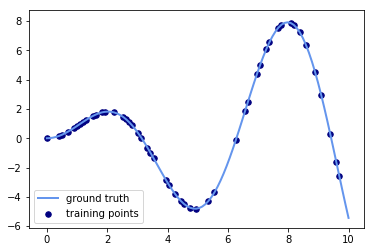

In [17]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower left')

plt.show()

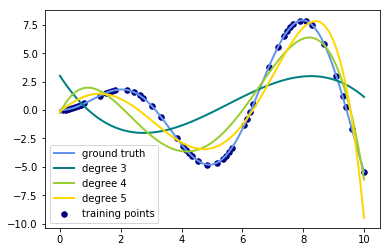

In [11]:
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")


for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [14]:


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 40
degrees = [1, 4 , 10, 25]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) #+ np.random.randn(n_samples) * 0.2
y[::5] += 2 * (0.2 - np.random.rand(n_samples // 5))


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)



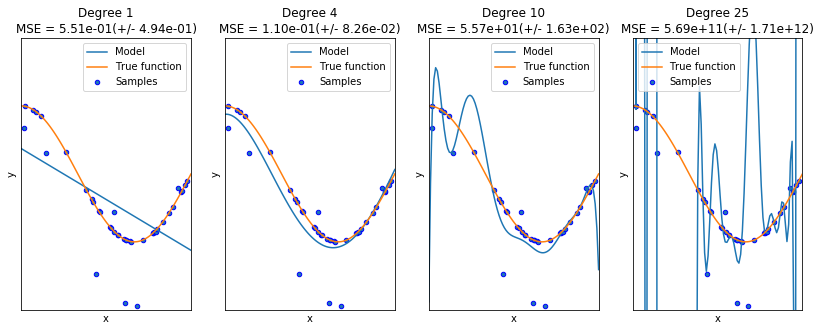

In [15]:
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [51]:
np.random.randn()*10

-2.420198298702195

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# generate 20 points from uniform (-3,3)
x = np.random.uniform(0, 5, size=50)
y = np.sin(x) + np.random.normal(scale=0.1, size=len(x))



In [94]:
y

array([ 1.09658673,  0.73429722,  0.99643074,  1.15943352,  0.9753921 ,
        0.7660919 , -0.51004223,  0.4574108 ,  1.02206011,  0.80950928,
       -0.11302127,  0.75915334,  0.78655741, -0.75909126,  1.05952439,
       -0.56844607,  0.93847954, -0.26010509, -0.01540316,  0.87425424,
        0.80977418, -0.28629448,  0.03547099, -0.07127944,  0.12202097,
       -1.07166289, -0.89510003,  0.64743297,  1.00104451, -1.037161  ,
        0.68949241,  0.81004317, -0.39211801,  0.73061856, -0.86592682,
        0.09029512,  0.20641846,  0.88337278,  1.11043725,  0.53468192,
        0.42257054, -0.04990971,  0.60141551, -0.72886493,  0.98028956,
        0.77654179,  0.55223616,  0.91953443,  0.70930099,  0.71325049])

<Figure size 1296x720 with 0 Axes>

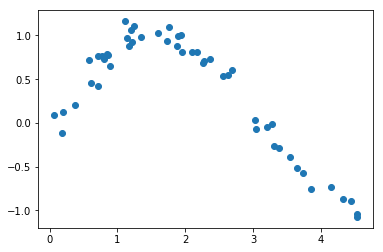

In [95]:
plt.figure(figsize=(18, 10))
fig, ax = plt.subplots()
ax.scatter(x,y)

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [81]:
linear_regression = LinearRegression()
linear_regression.fit(x_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
linear_regression.predict(x_test,y_test)

Object `linear_regression.predict(x_test,y_test)` not found.


<Figure size 1008x360 with 0 Axes>

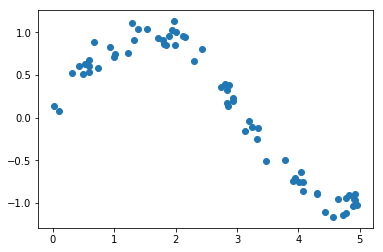

In [80]:
plt.figure(figsize=(14, 5))
fig, ax = plt.subplots()
ax.scatter(x_train,y_train)

In [ ]:
Y=numpy.random.normal(2*X+2,20)

In [177]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(1, 10,37)

y = np.sin(x) + np.random.normal(scale=0.3, size=len(x))


In [178]:
x

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
        3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
        5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
        7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75,
       10.  ])

In [179]:
y

array([ 0.72940457,  0.99528696,  0.92107553,  1.36018538,  1.25736079,
        0.44802559,  0.23374066,  0.342796  , -0.05854641,  0.11386267,
        0.03727923, -0.63990137, -1.1061964 , -1.09898111, -0.89465342,
       -0.98021754, -1.02077136, -1.00364504, -0.46542396, -0.53470748,
       -0.15587879,  0.35486594, -0.22932027,  0.51383046,  0.53888641,
        0.65462328,  1.01308615,  0.73948499,  0.72477463,  1.75240689,
        1.33893505,  0.91849801,  0.10160799, -0.01097092, -0.36834401,
       -0.42732307, -0.51489128])

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

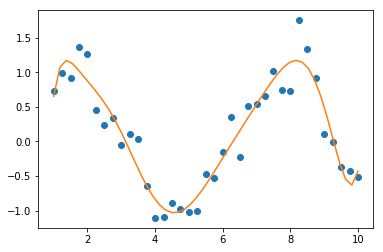

In [186]:
p = np.poly1d(np.polyfit(x, y, 10))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


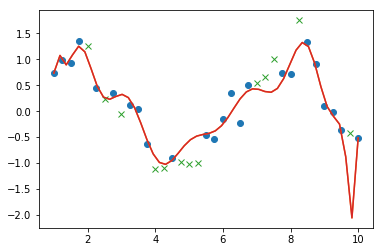

In [189]:
p = np.poly1d(np.polyfit(x_train, y_train, 15))
t = np.linspace(1, 10)
pl.plot(x_train,y_train,'o',t, p(t), '-')
pl.plot(x_test,y_test,'x',t, p(t), '-')

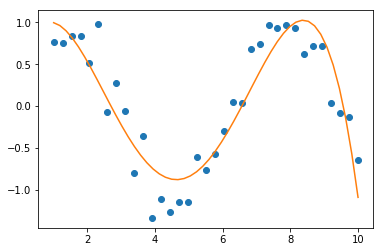

In [163]:
p = np.poly1d(np.polyfit(x, y, 4))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


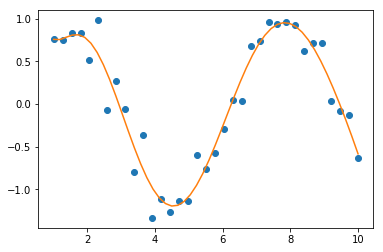

In [164]:
p = np.poly1d(np.polyfit(x, y, 8))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


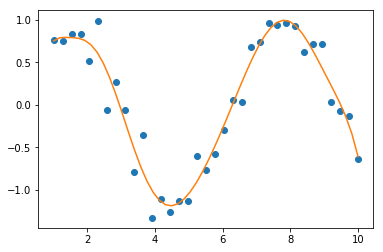

In [165]:
p = np.poly1d(np.polyfit(x, y, 12))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


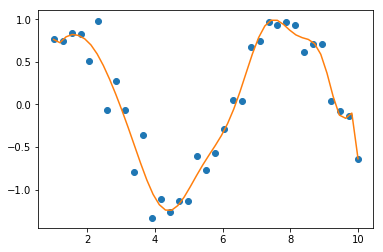

In [166]:
p = np.poly1d(np.polyfit(x, y, 16))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


/opt/conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


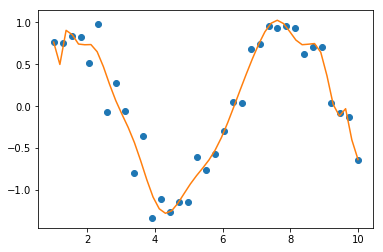

In [167]:
p = np.poly1d(np.polyfit(x, y, 20))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


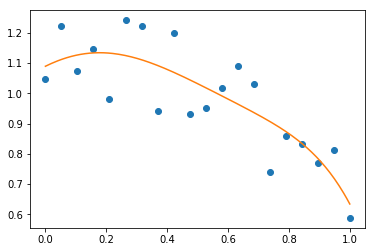

In [107]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 5))

t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()